<a href="https://colab.research.google.com/github/Bolaji1017/Medical-Insurance/blob/main/Medical_insurance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Description**

This dataset explores the cost of medical insurance based on key features such as, region, age, smoking status, number of children and BMI.

**1. Data Cleaning and Wrangling**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
insurance_data = pd.read_csv('https://raw.githubusercontent.com/Bolaji1017/Medical-Insurance/50bf0e217eeb25de1c7a378aa89623087f392ac2/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now that we have loaded in our dataset, we are going to check for missing values and duplicate rows. If any, we will drop the. duplicate rows and replace the missing values.

In [ ]:
data_types = insurance_data.dtypes
missing_values = insurance_data.isnull().sum()
data_types, missing_values

(age           int64
 sex          object
 bmi         float64
 children      int64
 smoker       object
 region       object
 charges     float64
 dtype: object,
 age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64)

In [ ]:
df_duplicates = insurance_data.duplicated().sum()
missing_rows = insurance_data[insurance_data.isnull().any(axis=1)]
df_duplicates, missing_rows

(np.int64(1),
 Empty DataFrame
 Columns: [age, sex, bmi, children, smoker, region, charges]
 Index: [])

In [ ]:
insurance_data = insurance_data.drop_duplicates()
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


There was one duplicate row that needed to be dropped, now we can move onto standardizing our data.

In [ ]:
insurance_data['sex'] = insurance_data['sex'].str.lower().str.strip()
insurance_data['smoker'] = insurance_data['smoker'].str.lower().str.strip()
insurance_data['region'] = insurance_data['region'].str.lower().str.strip()


After standardizing, I will make the smoker column a boolean.

In [ ]:
insurance_data['smoker_bool'] = insurance_data['smoker'].map({'yes': True, 'no': False})

Now, we will do some grouping for the ages.

In [ ]:
def age_group(age):
    if age < 30:
        return 'young'
    elif age < 60:
        return 'middle-aged'
    else:
        return 'senior'

insurance_data['age_group'] = insurance_data['age'].apply(age_group)


Finally, we will remove outliers in the charges and bmi columns.

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

insurance_data_cleaned = remove_outliers_iqr(insurance_data, 'charges')
insurance_data_cleaned = remove_outliers_iqr(insurance_data_cleaned, 'bmi')

print(insurance_data_cleaned.info())
print(insurance_data_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
Index: 1185 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1185 non-null   int64  
 1   sex          1185 non-null   object 
 2   bmi          1185 non-null   float64
 3   children     1185 non-null   int64  
 4   smoker       1185 non-null   object 
 5   region       1185 non-null   object 
 6   charges      1185 non-null   float64
 7   smoker_bool  1185 non-null   bool   
 8   age_group    1185 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 84.5+ KB
None
   age     sex     bmi  children smoker     region      charges  smoker_bool  \
0   19  female  27.900         0    yes  southwest  16884.92400         True   
1   18    male  33.770         1     no  southeast   1725.55230        False   
2   28    male  33.000         3     no  southeast   4449.46200        False   
3   33    male  22.705         0     no 

**Visualizations**

For the viusualizations, I will create a box plot, a histogram, and a bar plot.  
**Box Plot**: charges by smoker and sex
- will help us see how smoking status and gender affect insurance cost

**Histogram**: distrubution of BMI
- this helps us understand how BMI values are spread in the population

**Bar Plot**: average charges by age_group and smoker status
- this compares insurance charges across different age groups and their smoking status

<Axes: xlabel='smoker_bool', ylabel='charges'>

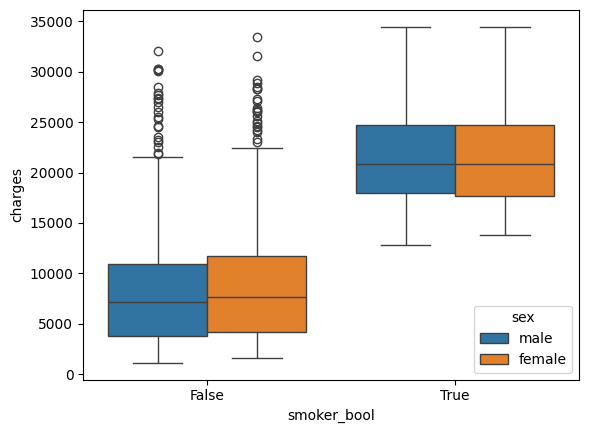

In [ ]:
sns.boxplot(x='smoker_bool', y='charges', hue='sex', data=insurance_data_cleaned)


**Question 1**: Do smokers pay higher insurance charges than non-smokers, and does this differ by gender?

Smokers do pay higher insurance charges than non-smokers. There is no major difference by gender. However, you do notice that for female non smokers, the insurance charge starting rate is a little higher than males and for male smokers, the insurance charge starting rate is a little higher than females.  

<Axes: xlabel='bmi', ylabel='Count'>

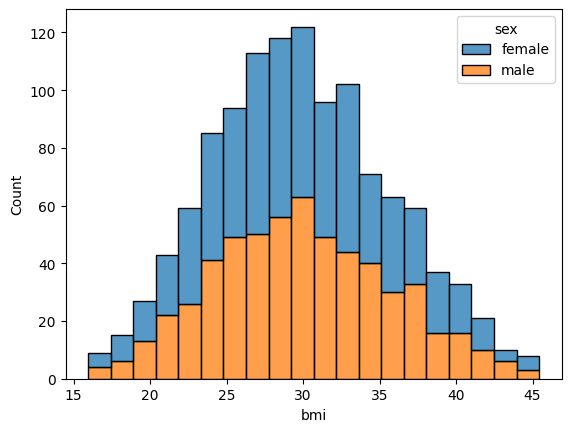

In [ ]:
sns.histplot(data=insurance_data_cleaned, x='bmi', hue='sex', bins=20, multiple='stack')


**Question 2**: What does the BMI distribution look like, and how does it differ between males and females?

The BMI ranges from 15-45 and the bmi of females is a lot higher than men. A BMI between 25 and 29.9 is considered to be overweight; males are less overweight than females according to this histogram.

<Axes: xlabel='age_group', ylabel='charges'>

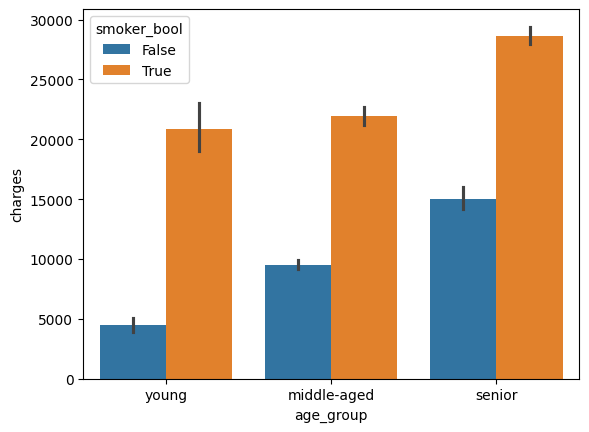

In [ ]:
sns.barplot(x='age_group', y='charges', hue='smoker_bool', data=insurance_data_cleaned)

**Question 3**: How do average insurance charges vary by age group, and how much more do smokers pay in each age group?

According to the bar plot, the older you are, the higher you pay in insurance charges. If you smoke, that payment is around twice as much if you didn't smoke.

**Probability**

1. AND Probability:

What is the probability that a person is male and a smoker?

2. OR Probability:

What is the probability that a person is female or from the southeast region?

3. Conditional Probability:

What is the probability that a person is a smoker, given that they are male?

4. Conditional Probability:

What is the probability that a person has more than 2 children, given that they are a smoker?



In [ ]:
# Total number of entries in the dataset
total = len(insurance_data)

# 1. AND Probability: Male AND Smoker
male_smoker = len(insurance_data[(insurance_data['sex'] == 'male') & (insurance_data['smoker_bool'] == True)])
prob_male_and_smoker = male_smoker / total

# 2. OR Probability: Female OR Southeast
female = len(insurance_data[insurance_data['sex'] == 'female'])
southeast = len(insurance_data[insurance_data['region'] == 'southeast'])
female_and_southeast = len(insurance_data[(insurance_data['sex'] == 'female') & (insurance_data['region'] == 'southeast')])
prob_female_or_southeast = (female + southeast - female_and_southeast) / total

# 3. Conditional Probability: Smoker | Male
male_total = len(insurance_data[insurance_data['sex'] == 'male'])
male_smoker_conditional = male_smoker / male_total

# 4. Conditional Probability: More than 2 children | Smoker
smokers = insurance_data[insurance_data['smoker_bool'] == True]
more_than_2_children_given_smoker = len(smokers[smokers['children'] > 2]) / len(smokers)

# Return the results
{
    "P(Male AND Smoker)": round(prob_male_and_smoker, 4),
    "P(Female OR Southeast)": round(prob_female_or_southeast, 4),
    "P(Smoker | Male)": round(male_smoker_conditional, 4),
    "P(Children > 2 | Smoker)": round(more_than_2_children_given_smoker, 4)
}


{'P(Male AND Smoker)': 0.1189,
 'P(Female OR Southeast)': 0.6365,
 'P(Smoker | Male)': 0.2356,
 'P(Children > 2 | Smoker)': 0.1569}

1. Based on the sample data. the probability that a person is male and a smoker is 11.89%.

2. The probability that a person is female or from the southeast region is 63.65% (sample data).

3. The probability that a person is a male smoker is 23.56%.

4. The probability that a person is a smoker and has more than two children is 15.69%.

**Probabilities based on the normal distrubution model**

**Question 1**: What is P(Sample Mean > $20,000)?

We're estimating the probability that the average insurance charges for a sample of 40 people exceeds $20,000.

**Question 2**: What is P(Sample Mean < $10,000)?

We want the probability that the sample mean of charges is less than $10,000.

**Question 3**: What is P($10,000 < Sample Mean < $20,000)?

We want the probability that the average charges for a group of 40 people fall between $10,000 and $20,000.


In [ ]:
charges = insurance_data['charges']

n = 40
mean_charges = charges.mean()
std_charges = charges.std()

se_charges = std_charges / np.sqrt(n)

prob_q1 = 1 - stats.norm.cdf(20000, mean_charges, se_charges)
prob_q2 = stats.norm.cdf(10000, mean_charges, se_charges)
prob_q3 = stats.norm.cdf(20000, mean_charges, se_charges) - stats.norm.cdf(10000, mean_charges, se_charges)

print(f"Probability that sample mean > $20,000: {prob_q1:.4f}")
print(f"Probability that sample mean < $10,000: {prob_q2:.4f}")
print(f"Probability that 10,000 < sample mean < 20,000: {prob_q3:.4f}")


Probability that sample mean > $20,000: 0.0002
Probability that sample mean < $10,000: 0.0434
Probability that 10,000 < sample mean < 20,000: 0.9564


**Question 1**: .02%

It is extremely unlikely that the average insurance charges for 40 randomly selected people would be above $20,000.

**Question 2**: 4.34%

There is a moderate chance—about 4 in 100—that the average charges in a sample of 40 people is less than $10,000.

**Question 3**: 95.6%

This is the most likely scenario. In about 96% of samples of 40 people, the average insurance charges will fall between $10,000 and $20,000.





**Confidence Intervals**

1. Mean BMI
2. Mean Medical Charges
3. Proportion of Smokers

In [ ]:
def confidence_interval_mean(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)  # standard error of the mean
    margin = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - margin, mean + margin

def confidence_interval_proportion(successes, n, confidence=0.95):
    p = successes / n
    z = stats.norm.ppf((1 + confidence) / 2.)
    margin = z * np.sqrt(p * (1 - p) / n)
    return p, p - margin, p + margin

bmi_ci = confidence_interval_mean(insurance_data['bmi'])
charges_ci = confidence_interval_mean(insurance_data['charges'])

smoker_count = insurance_data['smoker_bool'].value_counts().get(True, 0)
total_count = len(insurance_data)
smoker_ci = confidence_interval_proportion(smoker_count, total_count)

bmi_ci, charges_ci, smoker_ci


((np.float64(30.66345175766642),
  np.float64(30.336156889181368),
  np.float64(30.99074662615147)),
 (np.float64(13279.121486655948),
  np.float64(12629.391284827158),
  np.float64(13928.851688484738)),
 (np.float64(0.2049364248317128),
  np.float64(0.18329963165171317),
  np.float64(0.2265732180117124)))

**Mean BMI**:
95% Confidence Interval: (30.34, 30.99)

We are 95% confident that the average BMI of the population represented by this dataset lies between 30.34 and 30.99.

**Mean Medical Charges**:
95% Confidence Interval: ($12,629.39, $13,928.85)

We are 95% confident that the average annual medical charges for individuals in the dataset are between $12,629.39 and $13,928.85.

**Proportion of Smokers**:
95% Confidence Interval: (18.32%, 22.65%)

We are 95% confident that between 18.32% and 22.65% of individuals in the population are smokers.

**Hypothesis Testing**:

**1.** One Sample T-test: Average Medical Charges

We want to test if the average medical charges in our dataset are significantly higher than $12,000.

**Hypotheses**

Null Hypothesis H₀: μ = 12,000

(The average medical charges are $12,000)

Alternative Hypothesis H₁: μ > 12,000

(The average medical charges are greater than $12,000)

**2.** Two Sample T-test: Charges for Smokers vs. Non-Smokers

We want to know if smokers have significantly different medical charges than non-smokers.

**Hypotheses**

Null Hypothesis H₀: μ₁ = μ₂

(Average charges for smokers equal non-smokers)

Alternative Hypothesis H₁: μ₁ ≠ μ₂

(There is a difference in average charges)

**3.** Proportion Test: Are More Than 20% of People Smokers?

Check whether more than 20% of individuals in the dataset are smokers.

**Hypotheses**

Null Hypothesis H₀: p = 0.20

Alternative Hypothesis H₁: p > 0.20


In [ ]:
charges = insurance_data['charges']
t_stat, p_val = stats.ttest_1samp(charges, 12000, alternative='greater')

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")

smoker_charges = insurance_data[insurance_data['smoker_bool'] == True]['charges']
non_smoker_charges = insurance_data[insurance_data['smoker_bool'] == False]['charges']

t_stat, p_val = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")

from statsmodels.stats.proportion import proportions_ztest

count = insurance_data['smoker_bool'].value_counts()[True]
nobs = len(insurance_data)

stat, p_val = proportions_ztest(count, nobs, value=0.20, alternative='larger')

print(f"Z-statistic: {stat:.2f}")
print(f"P-value: {p_val:.4f}")




T-statistic: 3.86
P-value: 0.0001
T-statistic: 32.74
P-value: 0.0000
Z-statistic: 0.45
P-value: 0.3274


1.


T-statistic: 3.86

P-value: 0.0001

At the 5% significance level, we reject the null hypothesis. There is strong evidence that average medical charges are greater than $12,000.

2.


T-statistic: 32.74

P-value: 0


At the 5% significance level, we reject the null hypothesis. There is a significant difference in average charges between smokers and non-smokers in this test (smokers charges are higher).

3.


Z-statistic: 0.45

P-value: 0.3274

We fail to reject the null hypothesis. There is not enough evidence to conclude that more than 20% of individuals in the dataset are smokers.



**Freestyle Analysis**

Is there a relationship between the number of children someone has and their medical charges? I was curious if having more dependents might lead to higher costs.



children
0    12384.695344
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64


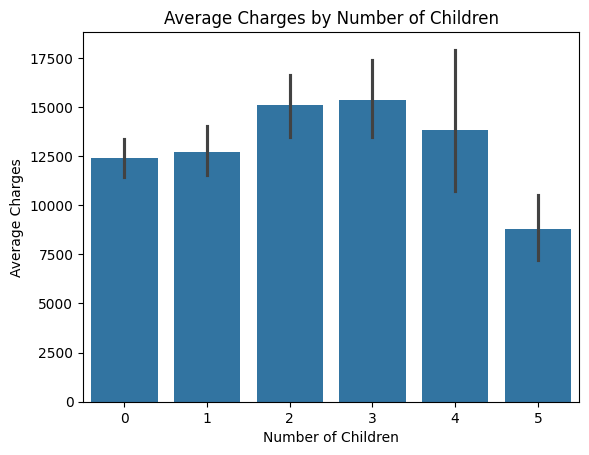

In [ ]:
charges_by_kids = insurance_data.groupby('children')['charges'].mean()
print(charges_by_kids)

sns.barplot(x='children', y='charges', data=insurance_data)
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.title('Average Charges by Number of Children')
plt.show()


There is no significant difference between number of children and average charges. It is slighty higher than people with 0 children arounf 1-4 children but the average charge of people with 5 children is lower than those with 0.